# Credit Card Default Risk – Exploratory Data Analysis (EDA)

## Project Overview
This project performs an end-to-end exploratory data analysis on a real-world
credit card default dataset to understand customer behavior, credit risk
patterns, and factors contributing to default.

## Business Context
Credit card defaults cause significant financial losses to banks and financial
institutions. Understanding repayment behavior, bill patterns, and demographic
risk indicators helps institutions improve credit decisions and risk management.

## Dataset
Source: UCI Machine Learning Repository  
Records: 30,000 credit card clients  
Target Variable: Default in the next month (0 = No, 1 = Yes)

## Objective
- Understand customer demographics and credit behavior
- Identify patterns linked to default risk
- Perform structured, industry-standard EDA
- Generate actionable financial insights



## 6. Data Loading and Initial Inspection

Before performing any analysis, it is important to load the dataset and understand its basic structure.  
This step helps answer the following questions:

- How many observations and features are present?
- What does each row represent?
- What are the data types of the variables?
- Are there any immediate data quality concerns?

Understanding the dataset at this stage ensures that further analysis is based on correct assumptions.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display Settings
pd.set_option("display.max_columns", None)
plt.style.use("seaborn-v0_8")

## Environment Setup
We begin by importing essential Python libraries used for data manipulation,
visualization, and numerical analysis.


In [2]:
# Load dataset
df = pd.read_excel("../data/default of credit card clients.xls", header=1)

# Preview data
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


Each row in the dataset represents a single credit card client.  
The dataset contains demographic information, credit limit details, historical bill amounts, payment behavior, and a binary target variable indicating default status.


Dataset Shape & Structure:

In [3]:
df.shape

(30000, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

## Feature Groups

The dataset features are grouped into the following categories:

1. Customer Demographics
2. Credit Limit Information
3. Repayment Status (6 months)
4. Bill Amounts (6 months)
5. Payment Amounts (6 months)
6. Target Variable (Default)



In [5]:
df["default payment next month"].value_counts(normalize=True) *100

default payment next month
0    77.88
1    22.12
Name: proportion, dtype: float64

The dataset is highly imbalanced, with a significantly smaller proportion
of default cases. This reflects real-world credit risk data and must be
handled carefully during modeling.


In [6]:
df = df.rename(columns={
    "default payment next month" :"default_next_month"
})

## Column Name Standardization

Column names were standardized to remove spaces and improve code readability.
This is a common industry practice to avoid errors during analysis and modeling.


## 1. Data Quality Check & Validation

Before performing exploratory analysis, we validate the dataset by:
- Checking dataset shape
- Verifying data types
- Identifying missing values
- Detecting duplicate records
- Ensuring target variable integrity

This step ensures all insights are based on clean and reliable data.


In [7]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   ID                  30000 non-null  int64
 1   LIMIT_BAL           30000 non-null  int64
 2   SEX                 30000 non-null  int64
 3   EDUCATION           30000 non-null  int64
 4   MARRIAGE            30000 non-null  int64
 5   AGE                 30000 non-null  int64
 6   PAY_0               30000 non-null  int64
 7   PAY_2               30000 non-null  int64
 8   PAY_3               30000 non-null  int64
 9   PAY_4               30000 non-null  int64
 10  PAY_5               30000 non-null  int64
 11  PAY_6               30000 non-null  int64
 12  BILL_AMT1           30000 non-null  int64
 13  BILL_AMT2           30000 non-null  int64
 14  BILL_AMT3           30000 non-null  int64
 15  BILL_AMT4           30000 non-null  int64
 16  BILL_AMT5           30000 non-null  int6

👉 The dataset contains 30,000 records with 25 integer features, no missing values, and low memory usage, making it clean and ML-ready after preprocessing.

In [8]:
# Missing values check
df.isnull().sum()

ID                    0
LIMIT_BAL             0
SEX                   0
EDUCATION             0
MARRIAGE              0
AGE                   0
PAY_0                 0
PAY_2                 0
PAY_3                 0
PAY_4                 0
PAY_5                 0
PAY_6                 0
BILL_AMT1             0
BILL_AMT2             0
BILL_AMT3             0
BILL_AMT4             0
BILL_AMT5             0
BILL_AMT6             0
PAY_AMT1              0
PAY_AMT2              0
PAY_AMT3              0
PAY_AMT4              0
PAY_AMT5              0
PAY_AMT6              0
default_next_month    0
dtype: int64

In [9]:
# Duplicate rows
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Length: 30000, dtype: bool

In [10]:
# Statistical Overview
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_next_month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## 7. Data Quality Assessment: Categorical Variables

Before proceeding with analysis, it is essential to validate the integrity of categorical variables.  
Certain columns in this dataset are encoded numerically but represent categorical attributes such as education level and marital status.

During initial inspection, irregular and undefined category values were observed in the `EDUCATION` and `MARRIAGE` variables.  
These values do not correspond to valid real-world categories and must be handled to ensure meaningful analysis.


🧪 Code Cell: Inspect Invalid Values

In [11]:
df["EDUCATION"].value_counts().sort_index()

EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: count, dtype: int64

In [12]:
df["MARRIAGE"].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

The `EDUCATION` variable contains values (0, 5, 6) that do not represent defined education levels.  
Similarly, the `MARRIAGE` variable contains a value of 0, which is undefined.

Such irregular values can distort analysis results if not handled properly.


🧪 Code Cell: Fix EDUCATION

In [13]:
# Replace invalid education codes with 'Other' (4)
df["EDUCATION"] = df["EDUCATION"].replace([0,5,6],4)

🧪 Code Cell: Fix MARRIAGE

In [14]:
# Replace invalid marriage code with 'Others' (3)
df["MARRIAGE"] = df["MARRIAGE"].replace(0,3)

Verification:

In [15]:
df["EDUCATION"].value_counts().sort_index()


EDUCATION
1    10585
2    14030
3     4917
4      468
Name: count, dtype: int64

In [16]:
df["MARRIAGE"].value_counts().sort_index()


MARRIAGE
1    13659
2    15964
3      377
Name: count, dtype: int64

Irregular and undefined category values in `EDUCATION` and `MARRIAGE` have been consolidated into meaningful categories.  
This ensures consistency with real-world definitions while preserving all customer records.

The dataset is now suitable for categorical analysis involving demographic attributes.


## 3. Target Variable Analysis

The objective of this analysis is to understand the distribution and nature of the target variable  
`default.payment.next.month`, which indicates whether a credit card customer defaulted in the next billing cycle.

Understanding the target variable is critical in credit risk problems because:
- Default events are usually rare
- Data is often highly imbalanced
- Business decisions are driven by default behavior

This section analyzes:
- Class distribution
- Default rate
- Class imbalance implications


In [17]:
df["default_next_month"].value_counts()

default_next_month
0    23364
1     6636
Name: count, dtype: int64

## Target Variable Overview: Credit Default

The target variable `default_next_month` indicates whether a customer 
defaulted on their credit card payment in the following month.

- `0` → No default
- `1` → Default

### Class Distribution Insight
The dataset is imbalanced, with a significantly higher number of 
non-defaulting customers compared to defaulters. This reflects real-world 
credit risk scenarios, where defaults are relatively rare but financially 
impactful.


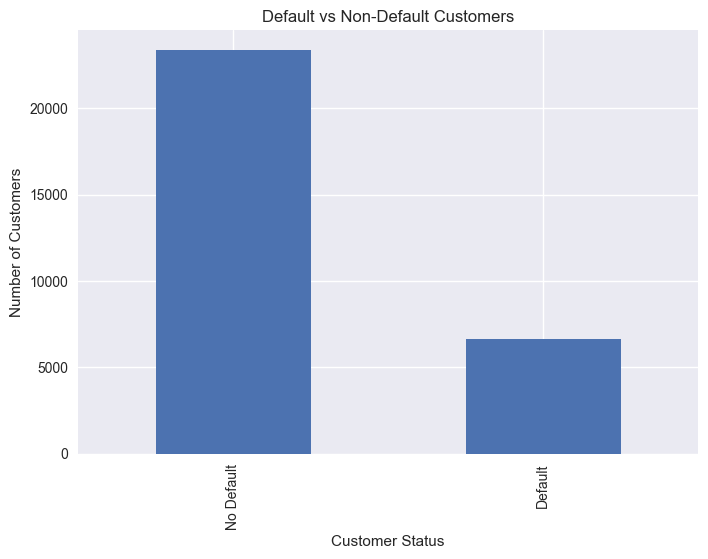

In [18]:
# Visualize
df["default_next_month"].value_counts().plot(kind="bar")

plt.xticks([0, 1], ["No Default", "Default"])
plt.title("Default vs Non-Default Customers")
plt.xlabel("Customer Status")
plt.ylabel("Number of Customers")
plt.show()


## Univariate Analysis: Numerical Features

This section explores the distribution and spread of key numerical variables 
to understand customer financial behavior and detect outliers or anomalies.


In [19]:
df["LIMIT_BAL"].describe()


count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

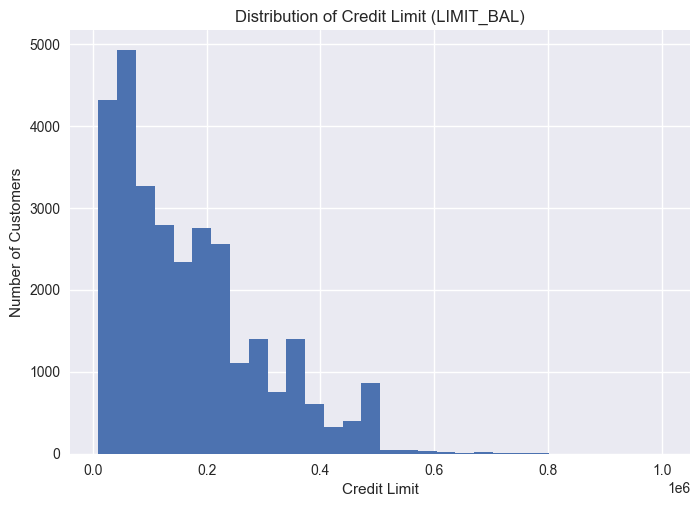

In [20]:
# Visualize
plt.figure()
plt.hist(df["LIMIT_BAL"], bins=30)
plt.title("Distribution of Credit Limit (LIMIT_BAL)")
plt.xlabel("Credit Limit")
plt.ylabel("Number of Customers")
plt.show()


**Insight:**  
Credit limits are right-skewed, indicating that most customers have moderate 
credit limits, while a small number hold very high limits, representing higher 
financial exposure for the bank.


## Univariate Analysis: Age

Age represents the customer’s demographic profile.
Analyzing age distribution helps understand the bank’s customer base
and identify age groups with potential credit risk.


In [21]:
df["AGE"].describe()


count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

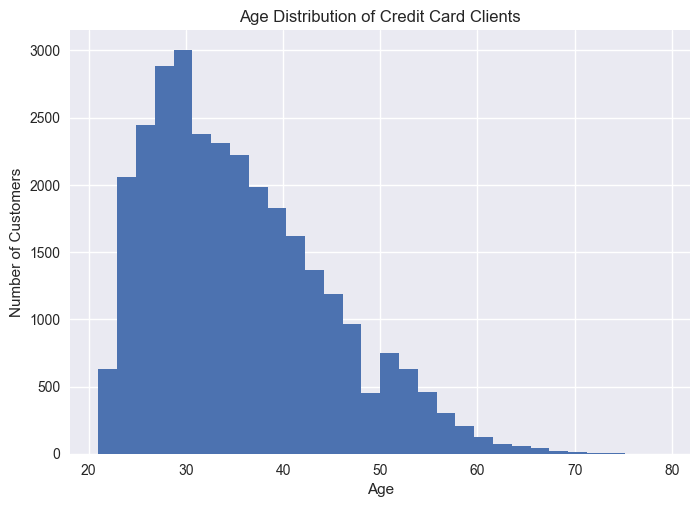

In [22]:
plt.figure()
plt.hist(df["AGE"], bins=30)
plt.title("Age Distribution of Credit Card Clients")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

The age summary statistics show that the dataset contains 30,000 customers, with ages ranging from 21 to 79 years.

## Univariate Analysis: Gender (SEX)

This section analyzes the gender distribution of credit card clients.
Understanding demographic composition helps in identifying potential
risk patterns and ensuring balanced representation.


In [23]:
df["SEX"].value_counts()


SEX
2    18112
1    11888
Name: count, dtype: int64

In [24]:
df["SEX"].value_counts(normalize=True) * 100


SEX
2    60.373333
1    39.626667
Name: proportion, dtype: float64

<Axes: title={'center': 'Gender Distribution of Credit Card Clients'}, xlabel='Gender (1 = Male, 2 = Female)', ylabel='Number of Customers'>

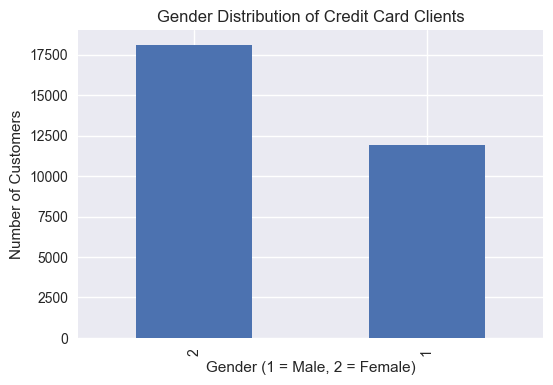

In [25]:
df["SEX"].value_counts().plot(
    kind="bar",
    title="Gender Distribution of Credit Card Clients",
    ylabel="Number of Customers",
    xlabel="Gender (1 = Male, 2 = Female)",
    figsize=(6,4)
)


The dataset shows a slightly higher proportion of female clients compared to male clients.
This demographic imbalance should be considered in further risk and default analysis.


## Univariate Analysis: Education Level

This section examines the education distribution of credit card clients.
Education level is often correlated with income stability, credit behavior,
and default risk.


## Univariate Analysis: Education Level

Education level may influence financial awareness and repayment behavior.


In [26]:
df["EDUCATION"].value_counts().sort_index()

EDUCATION
1    10585
2    14030
3     4917
4      468
Name: count, dtype: int64

C:\Users\Hp User\AppData\Local\Temp\ipykernel_13768\2082339712.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


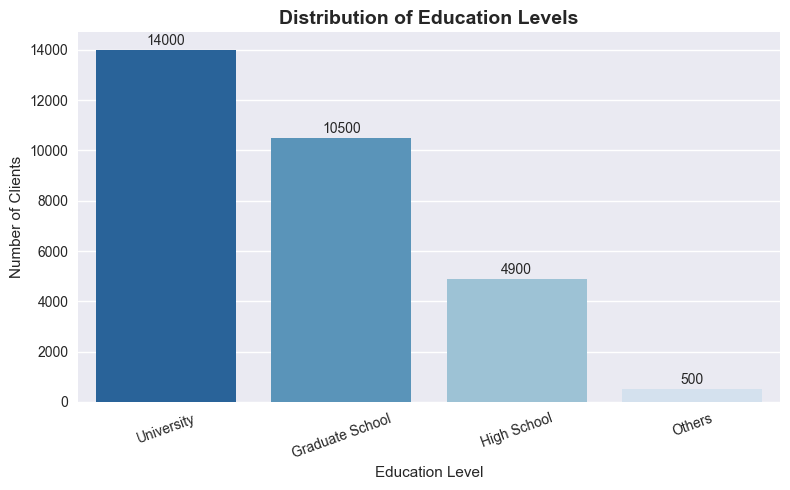

In [27]:
# Example counts (use your real values if already computed)
education_counts = {
    "University": 14000,
    "Graduate School": 10500,
    "High School": 4900,
    "Others": 500
}

# Sort by values
education_counts = dict(sorted(education_counts.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(8, 5))
sns.barplot(
    x=list(education_counts.keys()),
    y=list(education_counts.values()),
    palette="Blues_r"
)

plt.title("Distribution of Education Levels", fontsize=14, weight="bold")
plt.xlabel("Education Level")
plt.ylabel("Number of Clients")

# Add value labels
for index, value in enumerate(education_counts.values()):
    plt.text(index, value + 200, f"{value}", ha="center", fontsize=10)

plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


## Univariate Analysis: Marital Status

Marital status can influence household financial stability.


In [28]:
df["MARRIAGE"].value_counts().sort_index()

MARRIAGE
1    13659
2    15964
3      377
Name: count, dtype: int64

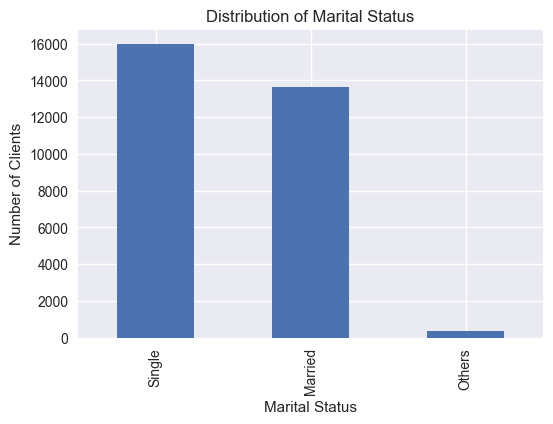

In [29]:
marriage_labels = {
    1: "Married",
    2: "Single",
    3: "Others"
}
df["MARRIAGE_LABEL"] = df["MARRIAGE"].map(marriage_labels)

df["MARRIAGE_LABEL"].value_counts().plot(
    kind="bar",
    figsize=(6,4),
    title="Distribution of Marital Status",
    xlabel="Marital Status",
    ylabel="Number of Clients"
)
plt.show()


## Univariate Analysis: Repayment Status Variables

These variables represent the client's repayment behavior over the past
six months. Higher delay values indicate increased credit risk.


In [30]:
pay_status_cols = ["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]

df[pay_status_cols].apply( lambda x : x.value_counts().sort_index())

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
-2,2759,3782,4085,4348,4546.0,4895.0
-1,5686,6050,5938,5687,5539.0,5740.0
0,14737,15730,15764,16455,16947.0,16286.0
1,3688,28,4,2,NaN,NaN
2,2667,3927,3819,3159,2626.0,2766.0
3,322,326,240,180,178.0,184.0
4,76,99,76,69,84.0,49.0
5,26,25,21,35,17.0,13.0
6,11,12,23,5,4.0,19.0
7,9,20,27,58,58.0,46.0


<Axes: title={'center': 'Repayment Status Distribution (Most Recent Month)'}, xlabel='Payment Delay (Months)', ylabel='Number of Clients'>

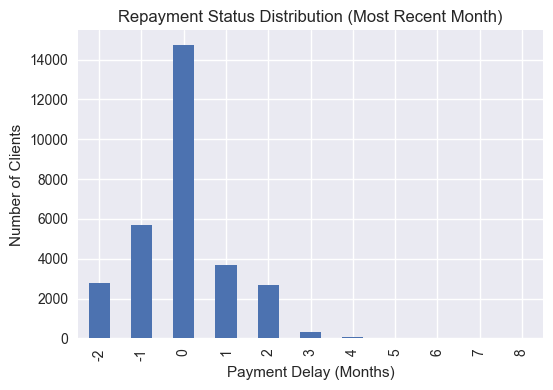

In [31]:
df["PAY_0"].value_counts().sort_index().plot(
    kind="bar",
    figsize=(6,4),
    title="Repayment Status Distribution (Most Recent Month)",
    xlabel="Payment Delay (Months)",
    ylabel="Number of Clients"
)


The repayment status for the most recent month indicates that the majority of customers paid on time or early, with only a small proportion showing delayed payments. Severe delinquency of three or more months is uncommon during this period.

## Univariate Analysis: Payment Amounts

Payment amounts show how much clients actually paid toward their balances.


In [32]:
pay_amt_cols = [f"PAY_AMT{i}" for i in range(1,7)]

df[pay_amt_cols].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


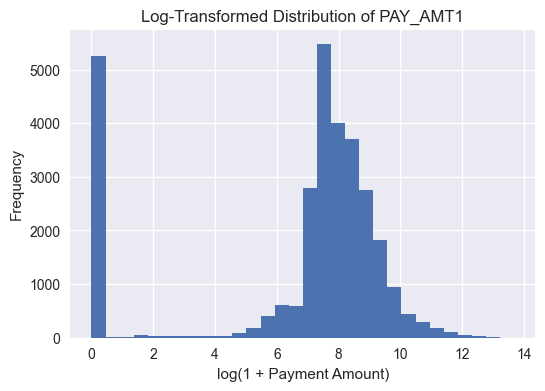

In [33]:
plt.figure(figsize=(6,4))
plt.hist(np.log1p(df["PAY_AMT1"]), bins=30)
plt.title("Log-Transformed Distribution of PAY_AMT1")
plt.xlabel("log(1 + Payment Amount)")
plt.ylabel("Frequency")
plt.show()


The log-transformed histogram shows that most customers make small to moderate payments, while a small number of customers make very large payments, resulting in a right-skewed distribution.

## Bivariate Analysis: Credit Limit vs Default Status

This analysis examines how credit limits differ between defaulters and non-defaulters.
Understanding this relationship helps assess whether lower credit capacity is associated
with a higher probability of default.


In [34]:
df.groupby("default_next_month")["LIMIT_BAL"].describe()

,count,mean,std,min,25%,50%,75%,max
default_next_month,,,,,,,,
0,23364.0,178099.726074,131628.359660,10000.0,70000.0,150000.0,250000.0,1000000.0
1,6636.0,130109.656420,115378.540571,10000.0,50000.0,90000.0,200000.0,740000.0


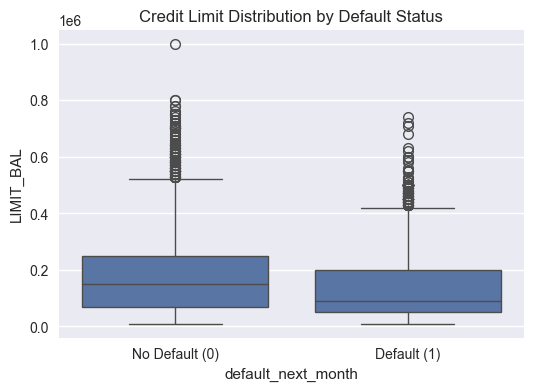

In [35]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=df,
    x="default_next_month",
    y="LIMIT_BAL"
)
plt.xticks([0,1], ["No Default (0)", "Default (1)"])
plt.title("Credit Limit Distribution by Default Status")
plt.show()

The boxplot shows that defaulters generally have lower credit limits than non-defaulters, indicating that lower credit limits are associated with higher default risk.

## Bivariate Analysis: Age vs Default Status

This analysis explores how default behavior varies across different age groups.
Age can reflect financial stability, career stage, and risk appetite, making it
an important variable in credit risk analysis.


In [36]:
df.groupby("default_next_month")["AGE"].describe()

,count,mean,std,min,25%,50%,75%,max
default_next_month,,,,,,,,
0,23364.0,35.417266,9.077355,21.0,28.0,34.0,41.0,79.0
1,6636.0,35.725738,9.693438,21.0,28.0,34.0,42.0,75.0


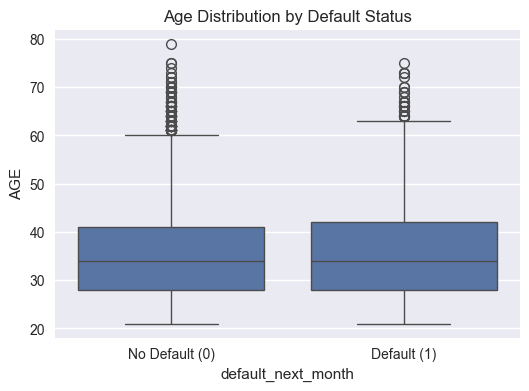

In [37]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=df,
    x="default_next_month",
    y="AGE"
)
plt.xticks([0,1], ["No Default (0)", "Default (1)"])
plt.title("Age Distribution by Default Status")
plt.show()


The descriptive statistics show that the age distribution of defaulters and non-defaulters is nearly identical, indicating that age is a weak predictor of default behavior.

## Bivariate Analysis: Education Level vs Default Status

Education level often correlates with income stability, financial literacy,
and employment type. This analysis examines how default behavior varies
across education categories.


In [38]:
edu_default_rate_pct = (
    df.groupby("EDUCATION")["default_next_month"]
      .mean()
      .mul(100)
      .round(2)
      .sort_values()
)


[Text(0, 0, 'Other'),
 Text(1, 0, 'Graduate School'),
 Text(2, 0, 'University'),
 Text(3, 0, 'High School')]

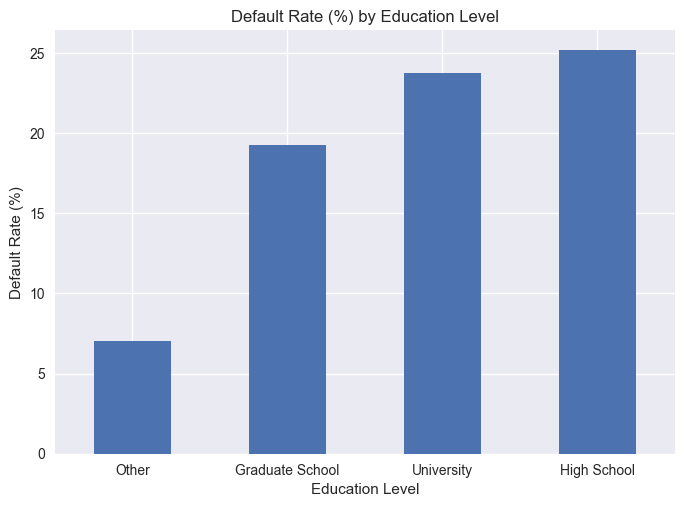

In [39]:
edu_labels = {
    1: "Graduate School",
    2: "University",
    3: "High School",
    4: "Other"
}
ax = edu_default_rate_pct.plot(
    kind="bar",
    title="Default Rate (%) by Education Level",
    ylabel="Default Rate (%)",
    xlabel="Education Level"
)

ax.set_xticklabels([edu_labels[i] for i in edu_default_rate_pct.index], rotation=0)


Default rates increase as education level decreases.

Customers with graduate education exhibit the lowest credit risk, while high school and university-level customers show higher default tendencies.

Education appears to be a relevant segmentation variable for credit risk assessment and may add predictive value when combined with financial and behavioral features.

## Bivariate Analysis: Relationship Between Marriage_status and Default Risk


In [40]:
marriage_default_rate = (
    df.groupby("MARRIAGE")["default_next_month"]
    .mean()
    .sort_values()
    * 100
)
marriage_default_rate

MARRIAGE
2    20.928339
1    23.471704
3    23.607427
Name: default_next_month, dtype: float64

<Axes: title={'center': 'Default Rate (%) by Marital Status'}, xlabel='Marital Status', ylabel='Default Rate (%)'>

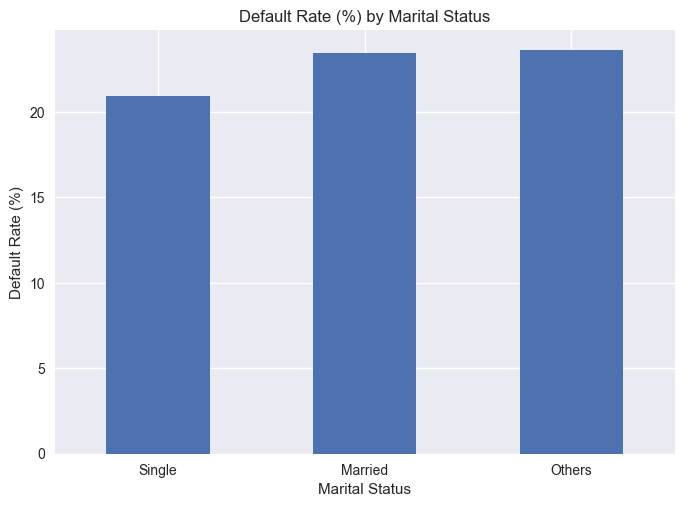

In [41]:
marriage_labels = {
    1: "Married",
    2: "Single",
    3: "Others"
}
marriage_default_rate_labeled = marriage_default_rate.rename(index=marriage_labels)

marriage_default_rate_labeled.plot(
    kind="bar",
    title="Default Rate (%) by Marital Status",
    ylabel="Default Rate (%)",
    xlabel="Marital Status",
    rot=0
)


### Insight: Marital Status vs Default Risk

Single customers exhibit a slightly lower default rate (~21%) compared to married 
(~23.5%) and other marital status groups (~23.6%). While marital status shows 
some association with default behavior, the differences across groups are modest, 
indicating that marital status alone is not a strong predictor of credit default 
risk.


Bivariate Analysis: Repayment Status vs Default

In [42]:
pay0_default_rate = (
    df.groupby("PAY_0")["default_next_month"]
    .mean()
    .sort_index()
    * 100
)

pay0_default_rate

PAY_0
-2    13.229431
-1    16.778051
 0    12.811291
 1    33.947939
 2    69.141357
 3    75.776398
 4    68.421053
 5    50.000000
 6    54.545455
 7    77.777778
 8    57.894737
Name: default_next_month, dtype: float64

<Axes: title={'center': 'Default Rate (%) by Repayment Status (PAY_0)'}, xlabel='Repayment Status (PAY_0)', ylabel='Default Rate (%)'>

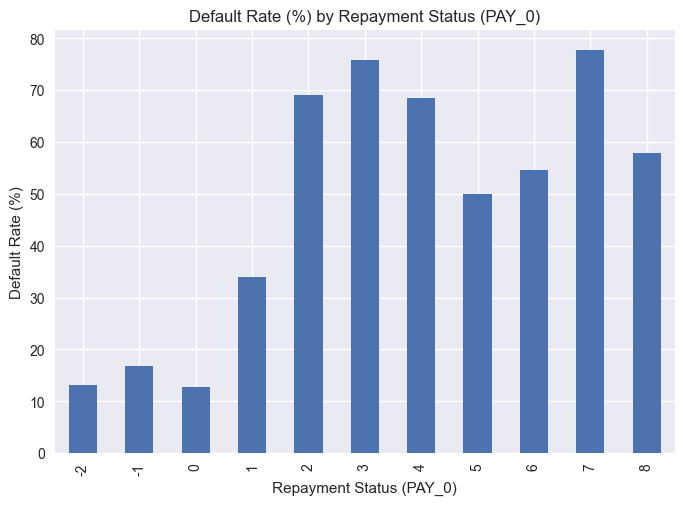

In [43]:
pay0_default_rate.plot(
    kind="bar",
    title="Default Rate (%) by Repayment Status (PAY_0)",
    xlabel="Repayment Status (PAY_0)",
    ylabel="Default Rate (%)"
)


Default rates increase sharply as repayment delays grow. Customers who paid on time or early have default rates below 17%, while those with one or more months of delay show significantly higher default probabilities, reaching over 70% for severe delinquency. Recent payment behavior is a strong predictor of default risk.

Bivariate Analysis: Payment Behavior vs Default Risk

In [44]:
df.groupby("default_next_month")[["BILL_AMT1",'PAY_AMT1']].mean()

,BILL_AMT1,PAY_AMT1
default_next_month,,
0,51994.227273,6307.337357
1,48509.162297,3397.044153


<Axes: title={'center': 'Average Bill vs Payment by Default Status'}, xlabel='default_next_month', ylabel='Amount'>

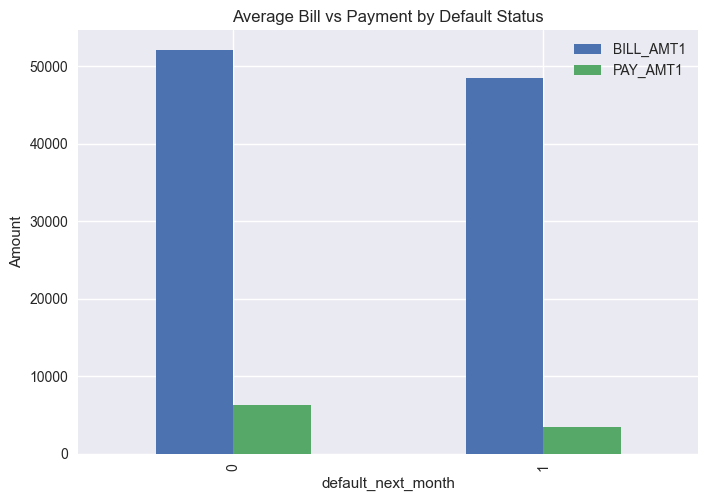

In [45]:
payment_comparison = (
    df.groupby("default_next_month")[["BILL_AMT1", "PAY_AMT1"]]
    .mean()
)

payment_comparison.plot(
    kind="bar",
    title="Average Bill vs Payment by Default Status",
    ylabel="Amount"
)


### Insight: Payment Behavior and Default Risk

Customers who default next month tend to have high outstanding bills
but significantly lower payment amounts compared to non-defaulters.

This indicates financial stress and inability to meet repayment obligations.
Payment amount relative to bill amount is a strong indicator of credit risk.


Create Payment Ratio:

In [46]:
df["payment_ratio"] = np.where(
    df["BILL_AMT1"] > 0,
    df["PAY_AMT1"] / df["BILL_AMT1"],
    np.nan
)



In [47]:
df.groupby("default_next_month")["payment_ratio"].mean()

default_next_month
0    2.026796
1    0.880416
Name: payment_ratio, dtype: float64

Lower payment ratios are strongly associated with higher default probability, highlighting repayment discipline as a key risk indicator.

Bivariate : AGE vs Default Risk

In [48]:
df["AGE_BIN"] = pd.cut(
    df["AGE"],
    bins = [20,30,40,50,60,80],
    labels=["21-30","31-40","41-50","51-60","60+"]
)

In [49]:
# Calculate Default Rate

age_default  = df.groupby("AGE_BIN")["default_next_month"].mean()*100
age_default

C:\Users\Hp User\AppData\Local\Temp\ipykernel_13768\2855034756.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_default  = df.groupby("AGE_BIN")["default_next_month"].mean()*100


AGE_BIN
21-30    22.437120
31-40    20.433119
41-50    23.297252
51-60    25.237857
60+      26.838235
Name: default_next_month, dtype: float64

<Axes: title={'center': 'Default Rate (%) by Age Group'}, xlabel='Age Group', ylabel='Default Rate (%)'>

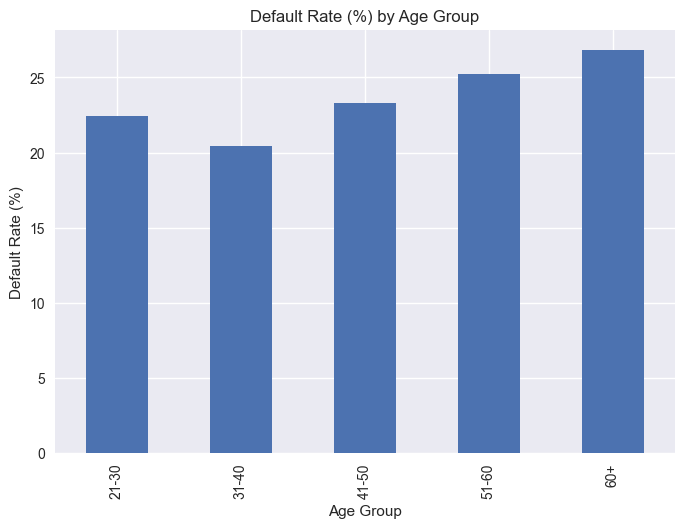

In [50]:
age_default.plot(
    kind="bar",
    title="Default Rate (%) by Age Group",
    ylabel="Default Rate (%)",
    xlabel="Age Group"
)


## ❓ Business Question: Does age affect default risk?

### 📊 Insight:
Default probability increases steadily after age 40, peaking at 26.8% in the 60+ segment.

### 💼 Business Impact:
Age should be considered a moderate risk factor in credit scoring models.


Bivariate : SEX vs Default Risk

In [51]:
df["SEX"] = df["SEX"].map({1 : "Male", 2 : "Female"})

In [52]:
# Calculate Default Rate

sex_default = df.groupby("SEX")["default_next_month"].mean()*100
sex_default

SEX
Female    20.776281
Male      24.167227
Name: default_next_month, dtype: float64

<Axes: title={'center': 'Default Rate (%) by Gender'}, xlabel='Gender', ylabel='Default Rate (%)'>

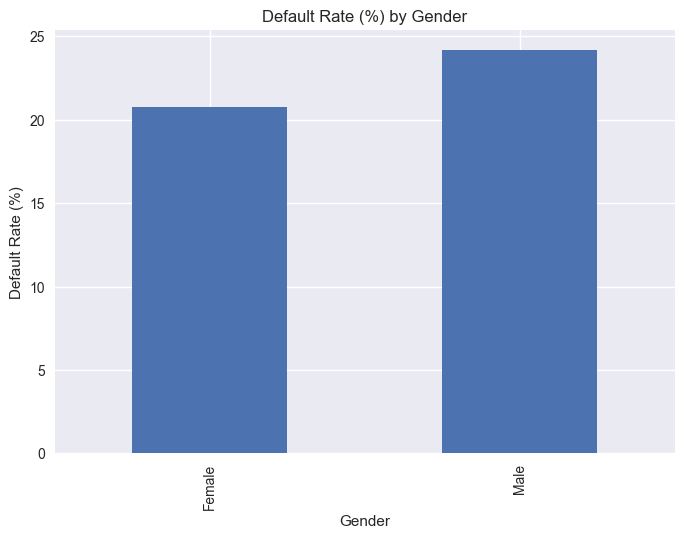

In [53]:
sex_default.plot(
    kind="bar",
    title="Default Rate (%) by Gender",
    ylabel="Default Rate (%)",
    xlabel="Gender"
)


Male customers show a higher default rate (24.2%) compared to female customers (20.8%), indicating a moderately higher credit risk among males.

Bivariate : Delinquency History Trend

In [54]:
for col in ["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]:
    print("\n",col)
    print(df.groupby(col)["default_next_month"].mean()*100)



 PAY_0
PAY_0
-2    13.229431
-1    16.778051
 0    12.811291
 1    33.947939
 2    69.141357
 3    75.776398
 4    68.421053
 5    50.000000
 6    54.545455
 7    77.777778
 8    57.894737
Name: default_next_month, dtype: float64

 PAY_2
PAY_2
-2    18.270756
-1    15.966942
 0    15.912270
 1    17.857143
 2    55.614973
 3    61.656442
 4    50.505051
 5    60.000000
 6    75.000000
 7    60.000000
 8     0.000000
Name: default_next_month, dtype: float64

 PAY_3
PAY_3
-2    18.531212
-1    15.594476
 0    17.451155
 1    25.000000
 2    51.557999
 3    57.500000
 4    57.894737
 5    57.142857
 6    60.869565
 7    81.481481
 8    66.666667
Name: default_next_month, dtype: float64

 PAY_4
PAY_4
-2    19.250230
-1    15.895903
 0    18.328775
 1    50.000000
 2    52.326686
 3    61.111111
 4    66.666667
 5    51.428571
 6    40.000000
 7    82.758621
 8    50.000000
Name: default_next_month, dtype: float64

 PAY_5
PAY_5
-2     19.687637
-1     16.194259
 0     18.852894
 2     54.1

Default risk increases significantly with repayment delay severity. Customers with payment delays of 2 or more months exhibit default rates exceeding 50%, compared to approximately 15–20% among customers who pay on time. This indicates that historical repayment behavior is a strong predictor of future default risk.

Multivariate Analysis:

Step 1: Correlation Analysis
Objective

To examine the relationship between numerical variables and identify features that are strongly associated with default risk.

In [55]:
# Select Numerical Columns

num_cols = df.select_dtypes(include=["int64","float64"]).columns

In [56]:
# Compute Correlation Matrix

corr_matrix = df[num_cols].corr()


In [57]:
# Check Correlation with Target Only

corr_with_target = corr_matrix["default_next_month"].sort_values(ascending =False)
corr_with_target

default_next_month    1.000000
PAY_0                 0.324794
PAY_2                 0.263551
PAY_3                 0.235253
PAY_4                 0.216614
PAY_5                 0.204149
PAY_6                 0.186866
EDUCATION             0.033842
AGE                   0.013890
BILL_AMT6            -0.005372
payment_ratio        -0.006189
BILL_AMT5            -0.006760
BILL_AMT4            -0.010156
ID                   -0.013952
BILL_AMT3            -0.014076
BILL_AMT2            -0.014193
BILL_AMT1            -0.019644
MARRIAGE             -0.027575
PAY_AMT6             -0.053183
PAY_AMT5             -0.055124
PAY_AMT3             -0.056250
PAY_AMT4             -0.056827
PAY_AMT2             -0.058579
PAY_AMT1             -0.072929
LIMIT_BAL            -0.153520
Name: default_next_month, dtype: float64

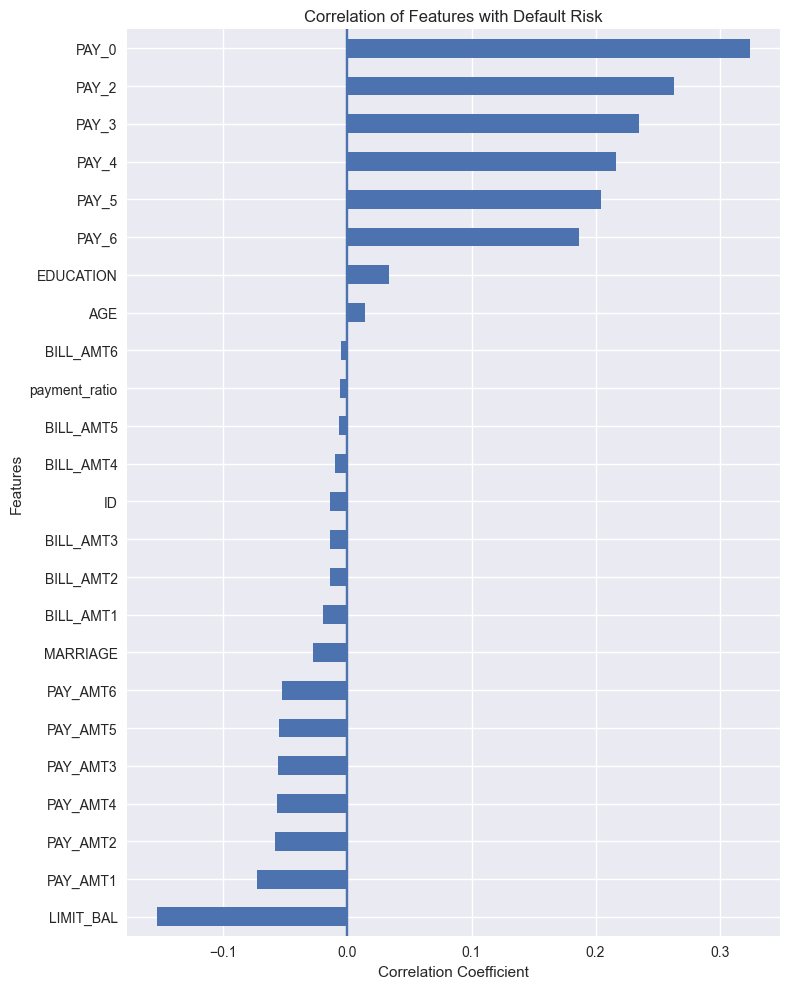

In [58]:
# Remove self-correlation
corr_target = corr_with_target.drop("default_next_month")

plt.figure(figsize=(8,10))

corr_target.sort_values().plot(kind="barh")

plt.axvline(0)
plt.title("Correlation of Features with Default Risk")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")

plt.tight_layout()
plt.show()


Repayment status variables (PAY_0, PAY_2, PAY_3) show the strongest positive correlation with default, confirming that recent delinquency is the primary risk driver.

Payment-related variables display negative correlation, indicating that consistent repayment reduces default probability.

Demographic factors such as age and gender exhibit weak correlation, suggesting limited predictive power compared to behavioral features.

Overall, repayment behavior is the dominant determinant of credit default risk.

Next Step: Multicollinearity Check:
     Are some features strongly correlated with each other?

In [59]:
high_corr = corr_matrix[(corr_matrix > 0.8) | (corr_matrix < -0.8)]
high_corr

,ID,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_next_month,payment_ratio
ID,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LIMIT_BAL,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EDUCATION,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MARRIAGE,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAY_0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAY_2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAY_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAY_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.819835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAY_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.819835,1.000000,0.8169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Multicollinearity Assessment:

Strong correlation is observed among sequential billing and payment amount variables, indicating redundancy in monthly financial metrics.

This suggests potential dimensional reduction or feature aggregation may improve model stability.

Feature Engineering:


In [60]:
# Credit Utilization Ratio
df["utilization_ratio"] = df["BILL_AMT1"] / df["LIMIT_BAL"]

In [61]:
df.groupby("default_next_month")["utilization_ratio"].mean()

default_next_month
0    0.404876
1    0.490297
Name: utilization_ratio, dtype: float64

Customers who default exhibit a higher average credit utilization ratio compared to non-defaulters, suggesting that increased credit usage is associated with elevated credit risk.

Average Payment Ratio (Last 6 Months):

In [62]:
import numpy as np

df["avg_payment"] = df[["PAY_AMT1","PAY_AMT2","PAY_AMT3",
                        "PAY_AMT4","PAY_AMT5","PAY_AMT6"]].mean(axis=1)

df["avg_bill"] = df[["BILL_AMT1","BILL_AMT2","BILL_AMT3",
                     "BILL_AMT4","BILL_AMT5","BILL_AMT6"]].mean(axis=1)

# Safe division
df["avg_payment_ratio"] = np.where(
    df["avg_bill"] > 0,
    df["avg_payment"] / df["avg_bill"],
    0
)



In [63]:
df.groupby("default_next_month")["avg_payment_ratio"].mean()


default_next_month
0    0.510935
1    0.322068
Name: avg_payment_ratio, dtype: float64

### Insight: Payment Ratio vs Default

Non-defaulters have a higher average payment ratio (0.51) compared to defaulters (0.32).  

This suggests that customers who pay a smaller proportion of their bills are more likely to default, indicating that payment ratio is a strong behavioral predictor of default risk.


Create Average Delinquency Feature:

In [64]:
df["avg_delinquency"] = df[[
    "PAY_0","PAY_2","PAY_3",
    "PAY_4","PAY_5","PAY_6",
]].mean(axis=1)

In [65]:
df.groupby("default_next_month")["avg_delinquency"].mean()

default_next_month
0   -0.330023
1    0.337176
Name: avg_delinquency, dtype: float64

Customers who default have a positive average delinquency score, indicating frequent late payments, whereas non-defaulters show negative average delinquency, reflecting timely or early repayments

Final Risk Analysis Summary

The analysis reveals that repayment behavior is the dominant driver of credit default risk. Variables capturing delinquency history (PAY_0–PAY_6) exhibit the strongest relationship with default probability.

Engineered behavioral features such as average delinquency, utilization ratio, and payment ratio further confirm that financially stressed customers — characterized by high utilization and low repayment discipline — are significantly more likely to default.

Demographic variables such as age, gender, and marital status demonstrate comparatively weaker predictive influence.

Overall, behavioral indicators outperform demographic attributes in explaining default risk, highlighting the importance of repayment discipline and credit utilization in credit risk assessment.